In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

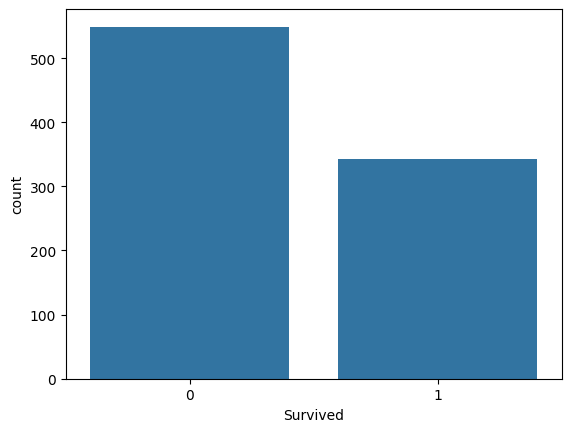

In [5]:
sns.countplot(x="Survived", data=df)

In [6]:
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
df.drop(columns=["Cabin"], inplace=True)  # Muitos valores ausentes

C:\Users\pedro\AppData\Local\Temp\ipykernel_6232\2070433838.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\pedro\AppData\Local\Temp\ipykernel_6232\2070433838.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [7]:
df["Sex"] = LabelEncoder().fit_transform(df["Sex"])  # male=1, female=0
df["Embarked"] = LabelEncoder().fit_transform(df["Embarked"])  # C=0, Q=1, S=2

In [8]:
X = df[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]
y = df["Survived"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=657
)

In [25]:
model_logistic_regression = LogisticRegression(max_iter=200)
model_logistic_regression.fit(X_train, y_train)

model_random_forest = RandomForestClassifier()
model_random_forest.fit(X_train, y_train)

model_decision_tree = DecisionTreeClassifier()
model_decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
y_pred_LR = model_logistic_regression.predict(X_test)
y_pred_RF = model_random_forest.predict(X_test)
y_pred_DT = model_decision_tree.predict(X_test)

In [27]:
print("Acurácia do modelo de Regressão Logística:", accuracy_score(y_test, y_pred_LR))
print("Acurácia do modelo de Random Forest:", accuracy_score(y_test, y_pred_RF))
print("Acurácia do modelo de Decision Tree:", accuracy_score(y_test, y_pred_DT))

Acurácia do modelo de Regressão Logística: 0.7988826815642458
Acurácia do modelo de Random Forest: 0.8268156424581006
Acurácia do modelo de Decision Tree: 0.7653631284916201


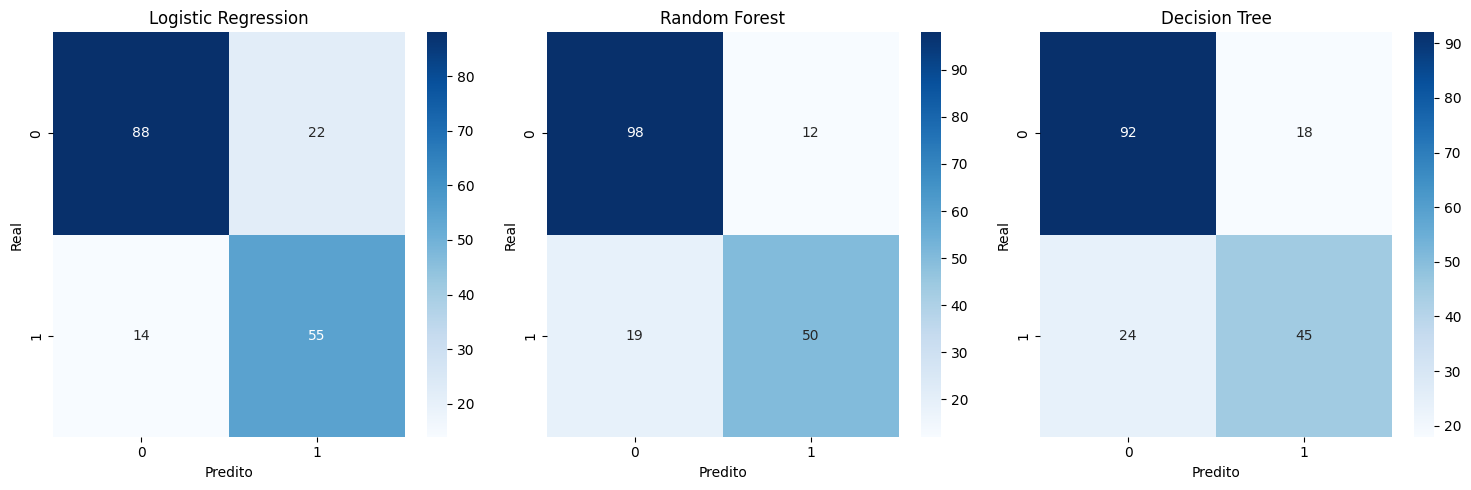

In [29]:
# Configura o layout do plot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Lista de nomes dos modelos e previsões
modelos = ['Logistic Regression', 'Random Forest', 'Decision Tree']
predicoes = [y_pred_LR, y_pred_RF, y_pred_DT]

# Loop para plotar cada matriz de confusão
for i in range(3):
    cm = confusion_matrix(y_test, predicoes[i])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axs[i])
    axs[i].set_title(f'{modelos[i]}')
    axs[i].set_xlabel('Predito')
    axs[i].set_ylabel('Real')

plt.tight_layout()
plt.show()